<a href="https://colab.research.google.com/github/s0ye0nyang/peoplespace-fastai/blob/master/shoes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pip

# !pip-compile requirements.in
# !pip install -r requirements.in
!pip install -Uqq fastbook
# !pip install -e ".[dev]"
import fastbook
import pandas as pd
import numpy as np
fastbook.setup_book()
# torch.cuda.is_available()


     |████████████████████████████████| 727kB 17.7MB/s 
     |████████████████████████████████| 194kB 58.9MB/s 
     |████████████████████████████████| 1.2MB 56.0MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
# from fastai.vision.widgets import *
from fastai.vision import *
from fastai.vision.widgets import *
from pandas import DataFrame
from PIL import Image, ImageOps


In [ ]:
!pip list -v 

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
# key = os.environ.get('AZURE_SEARCH_KEY', '2534e2ad7fb24dc4be8e38d7b3763a24')
# search_images_bing

# results = search_images_bing(key, 'shoes')
# ims = results.attrgot('content_url')
# len(ims)

# bear_types = 'nike','adidas','reebok'
# path = Path('bears')
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} bear')
#         download_images(dest, urls=results.attrgot('contentUrl'))

# fns = get_image_files(path)


In [6]:
# new_img =[]
# # creating an og_image object
# i=0
# for c in classes:
#     n = get_image_files(Path(root+'/'+c))
#     for name in n:
#       _image = Image.open(name)    
#       # print(str(name).split('/')[-1])
#       # applying grayscale method
#       gray_image = ImageOps.grayscale(_image)
#       gray_image.save(gpath[i]+'/'+str(name).split('/')[-1])
#     i+=1

In [7]:
root = '/content/gdrive/MyDrive/Data/dataset'
classes = ['nike','adidas','reebok']
path = [root+'/'+c for c in classes]
# gpath = [root+'/'+c+'-g' for c in classes]


In [8]:
df = DataFrame([],columns=['name','label'])
for i in range(len(classes)):
  newdf= DataFrame({
      'name':get_image_files(path[i]),
      'label':classes[i]
  })
  df = df.append(newdf)

display(df)

,name,label
0,/content/gdrive/MyDrive/Data/dataset/nike/0a14c686-eawzstfumaezit8.jpg,nike
1,/content/gdrive/MyDrive/Data/dataset/nike/123992.jpg,nike
2,/content/gdrive/MyDrive/Data/dataset/nike/12959912_13502989_600.jpg,nike
3,/content/gdrive/MyDrive/Data/dataset/nike/12959137_13486346_600.jpg,nike
4,/content/gdrive/MyDrive/Data/dataset/nike/13157995_27458924_600.jpg,nike
...,...,...
933,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg,reebok
934,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (8).jpg,reebok
935,/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (9).jpg,reebok
936,/content/gdrive/MyDrive/Data/dataset/reebok/WOMEN_RUNNING_SHOES_EG9015_1.jpg,reebok


In [9]:
np.random.seed(2)

In [10]:
tfms_tfms = aug_transforms(do_flip = False, flip_vert = False, mult=1.2,max_rotate=10,max_zoom=0.1,
                           pad_mode=PadMode.Border, p_lighting = 1)

In [11]:
data = ImageDataLoaders.from_df(df,'/',item_tfms=Resize(128), batch_tfms=tfms_tfms, bs = 30, num_workers = 1)

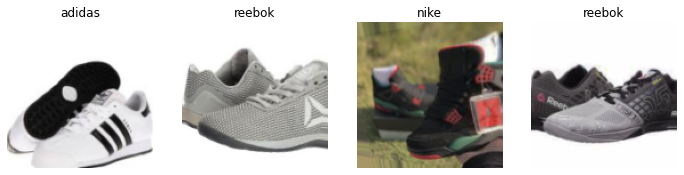

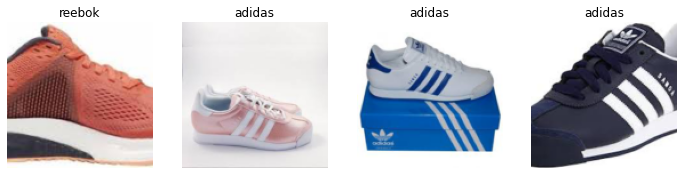

In [12]:
data.train.show_batch(max_n=4, nrows=1)
data.valid.show_batch(max_n=4, nrows=1)

In [13]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
# learn.lr_find()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.526423,0.995907,0.351548,13:23


epoch,train_loss,valid_loss,error_rate,time
0,0.979983,0.677469,0.225865,00:22
1,0.727329,0.538259,0.178506,00:22
2,0.464971,0.528824,0.180328,00:22
3,0.304999,0.465309,0.143898,00:22


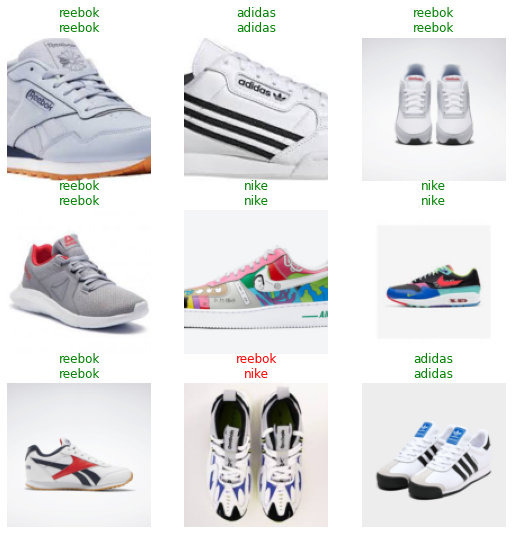

In [14]:
learn.fine_tune(4)
learn.show_results()

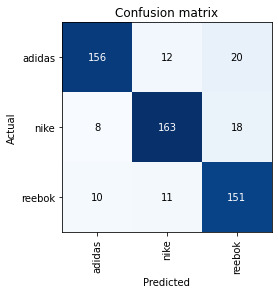

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

              precision    recall  f1-score   support

      adidas       0.90      0.83      0.86       188
        nike       0.88      0.86      0.87       189
      reebok       0.80      0.88      0.84       172

    accuracy                           0.86       549
   macro avg       0.86      0.86      0.86       549
weighted avg       0.86      0.86      0.86       549



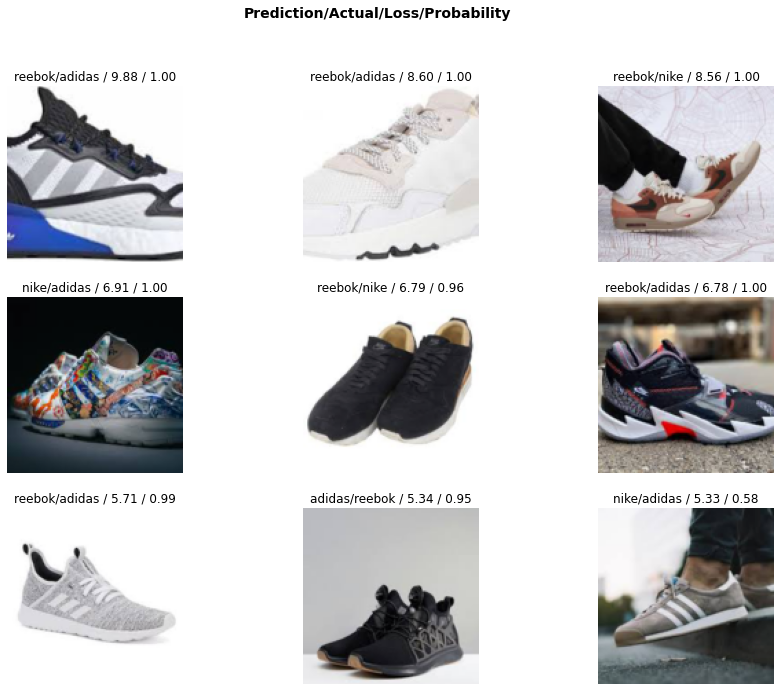

In [16]:
# interp.most_confused(min_val=2)
interp.plot_top_losses(10, figsize=(15,11))
interp.print_classification_report()


In [17]:
cleaner = ImageClassifierCleaner(learn)
cleaner

#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [18]:
learn.export()

In [19]:
Path('/').ls(file_exts='.pkl')

(#1) [Path('/export.pkl')]

In [20]:
learn_inf = load_learner('/export.pkl')

In [21]:
learn_inf.predict('/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg')

('reebok', tensor(2), tensor([0.0458, 0.3433, 0.6109]))

In [22]:
btn_upload = widgets.FileUpload()
# btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/Data/dataset/reebok/unnamed (7).jpg'])

In [23]:
btn_run = widgets.Button(description='Classify')

In [24]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [25]:
lbl_pred = widgets.Label()
out_pl = widgets.Output()

In [26]:
#hide_output
VBox([widgets.Label('Select your shoes!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 